# Model Development and Evaluation
## Linear Regreession
### Topics
- Linear Regressor
  - Evaluation Metrics
  - Coefficients of the model
  - Visualization of the results
- Logistic Regression Classifier
  - Evaluation Metrics
  - Coefficients of the model
  - Visualization of the results

## Requirements

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Data Loading & Preprocessing

In [9]:
data = pd.read_csv("KosteckiDillon.csv")

# Predicting headache severity based on age, air quality, and medication status
data_clean = data.dropna(subset=['age', 'airq', 'medication', 'headache'])  # Example features

# Encoding categorical variables
data_clean['medication'] = data_clean['medication'].map({'none': 0, 'reduced': 1, 'continuing': 2})
data_clean['headache'] = data_clean['headache'].map({'no': 0, 'yes': 1})

X = data_clean[['age', 'airq', 'medication']]  # Features
y = data_clean['headache']  # Target variable

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Linear Regressor

In [10]:
# Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [11]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Linear Regression Model Evaluation:
Mean Absolute Error (MAE): 0.45
Mean Squared Error (MSE): 0.22
Root Mean Squared Error (RMSE): 0.47
R-squared (R2): 0.01


### Coefficients of the model

In [12]:
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")

Intercept: 0.6234420396719188
Coefficients: [-0.00264393  0.00093398  0.07452895]


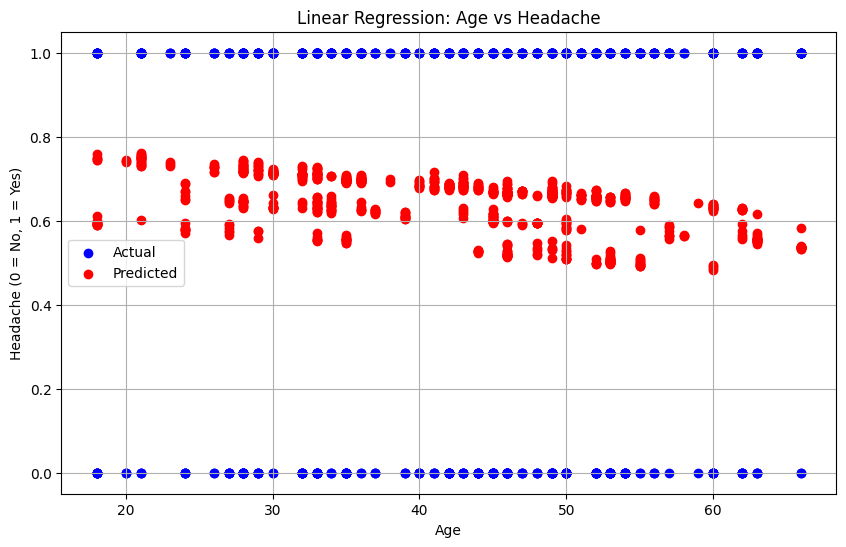

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test['age'], y_test, color='blue', label='Actual')
plt.scatter(X_test['age'], y_pred, color='red', label='Predicted')
plt.title("Linear Regression: Age vs Headache")
plt.xlabel("Age")
plt.ylabel("Headache (0 = No, 1 = Yes)")
plt.legend()
plt.grid(True)
plt.show()

## Logistic Regression Classifier

In [14]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

### Evaluation Metrics

In [15]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Logistic Regression Model Evaluation:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Logistic Regression Model Evaluation:
Accuracy: 0.65
Confusion Matrix:
[[  9 272]
 [ 17 533]]
Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.03      0.06       281
           1       0.66      0.97      0.79       550

    accuracy                           0.65       831
   macro avg       0.50      0.50      0.42       831
weighted avg       0.56      0.65      0.54       831



## Coefficients of the model

In [16]:
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")

Intercept: [0.52690958]
Coefficients: [[-0.01165927  0.00414775  0.31811045]]


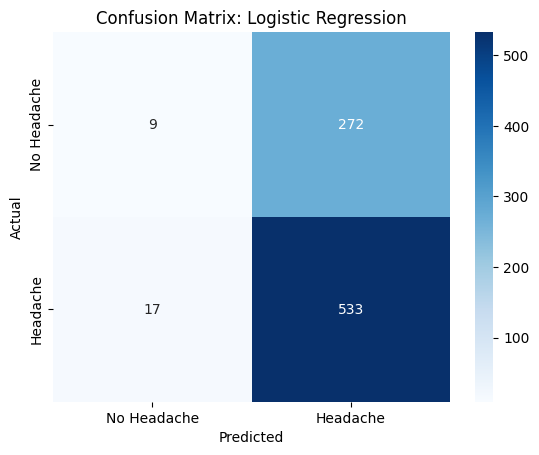

In [17]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Headache', 'Headache'], yticklabels=['No Headache', 'Headache'])
plt.title("Confusion Matrix: Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()